# **Introduction**


My name is Shiva Shamloo. I am a master student in the Concordia University. I joined the BrainHack school in order to gain some experience with neuroimage data and to find out more about the algorithms and the methods used in the neuroscience. For my project I decided to work on brain decoding in order to get familiarize with the fMRI data.

In [2]:
!pip install nilearn

     |████████████████████████████████| 2.5MB 2.7MB/s 


In [0]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from nilearn.input_data import NiftiMasker
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from nilearn.plotting import plot_stat_map, show
from nilearn import datasets
from sklearn.svm import SVC
from nilearn import image
import pandas as pd

# Loading the data

For this rpoject I will be using the Haxby dataset which is already preprocessed and it is available in the nilearn. The dataset is consist of the fMRI data of 6 people: 5 women and one man. For this project I will be using ventral temporal cortex for training the model. 


In [0]:
haxby_dataset = datasets.fetch_haxby()

fmri_filename = haxby_dataset.func[0]

mask_filename = haxby_dataset.mask_vt[0]

masker = NiftiMasker(mask_img=mask_filename, standardize=True)

behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")

conditions = behavioral['labels']
print(conditions.unique())

fmri_masked = masker.fit_transform(fmri_filename)

fmri_train, fmri_test, conditions_train, conditions_test = train_test_split(fmri_masked, conditions, test_size=0.2, random_state=0)


# Building the Decoders






# Logistic Regression


One vs. One:               precision    recall  f1-score   support

      bottle       0.83      0.91      0.87        22
         cat       0.85      0.94      0.89        18
       chair       0.79      0.95      0.86        20
        face       1.00      0.88      0.94        25
       house       1.00      0.89      0.94        19
        rest       0.95      0.96      0.95       117
    scissors       0.95      0.82      0.88        22
scrambledpix       0.96      1.00      0.98        25
        shoe       0.95      0.87      0.91        23

    accuracy                           0.93       291
   macro avg       0.92      0.91      0.91       291
weighted avg       0.93      0.93      0.93       291

One vs. Rest:               precision    recall  f1-score   support

      bottle       0.80      0.73      0.76        22
         cat       0.81      0.94      0.87        18
       chair       0.79      0.75      0.77        20
        face       1.00      0.84      0.91        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross Validation OvO: 0.898357259138671
Cross Validation OvR: 0.9026713038330619


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


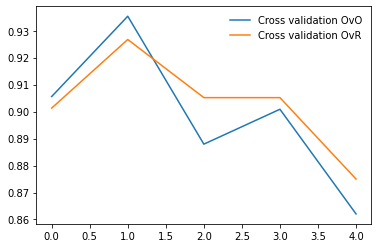

In [72]:
Log_reg_ovr = LogisticRegression(random_state=0, max_iter=500, multi_class='ovr').fit(fmri_train, conditions_train)
Log_reg_ovo = LogisticRegression(random_state=0, max_iter=500, multi_class='multinomial').fit(fmri_train, conditions_train)

log_reg_ovr_prediction=Log_reg_ovr.predict(fmri_test)
log_reg_ovo_prediction=Log_reg_ovo.predict(fmri_test)

Log_reg_ovr_report=classification_report(conditions_test,log_reg_ovr_prediction)
Log_reg_ovo_report=classification_report(conditions_test,log_reg_ovo_prediction)

print('One vs. One: '+str(Log_reg_ovo_report))
print('One vs. Rest: '+str(Log_reg_ovr_report))

cv_scores_ovo = cross_val_score(Log_reg_ovr, fmri_train, conditions_train, cv=5, verbose=1)
cv_scores_ova = cross_val_score(Log_reg_ovo, fmri_train, conditions_train, cv=5, verbose=1)

print('Cross Validation OvO:', cv_scores_ovo.mean())
print('Cross Validation OvR:', cv_scores_ova.mean())

plt.figure(figsize=(6, 4))
plt.plot(cv_scores_ovo, label='Cross validation OvO')
plt.plot(cv_scores_ova, label='Cross validation OvR')
plt.legend(loc='best', frameon=False)
show()


# Support Vector Machines

One vs. One:               precision    recall  f1-score   support

      bottle       0.83      0.91      0.87        22
         cat       0.80      0.89      0.84        18
       chair       0.81      0.85      0.83        20
        face       1.00      0.84      0.91        25
       house       0.94      0.89      0.92        19
        rest       0.96      0.96      0.96       117
    scissors       0.91      0.91      0.91        22
scrambledpix       0.88      0.92      0.90        25
        shoe       0.95      0.91      0.93        23

    accuracy                           0.92       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.92      0.92      0.92       291

One vs. Rest:               precision    recall  f1-score   support

      bottle       0.77      0.77      0.77        22
         cat       0.73      0.89      0.80        18
       chair       0.78      0.70      0.74        20
        face       1.00      0.84      0.91        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross Validation OvO: 0.8879902323516353
Cross Validation OvR: 0.8811269794287406


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.8s finished


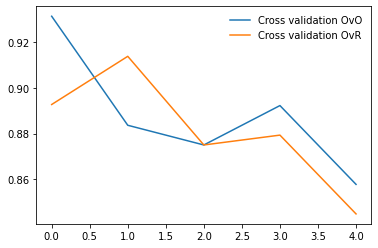

In [73]:
svc = SVC(kernel='linear')
svo=OneVsOneClassifier(svc)
sva=OneVsRestClassifier(svc)

svo.fit(fmri_train,conditions_train)
sva.fit(fmri_train,conditions_train)


svo_prediction = svo.predict(fmri_test)
svo_report=classification_report(conditions_test,svo_prediction)

sva_prediction = sva.predict(fmri_test)
sva_report=classification_report(conditions_test,sva_prediction)

print('One vs. One: ' + str(svo_report))
print('One vs. Rest: '+ str(sva_report))

cv_scores_ovo = cross_val_score(svo, fmri_train, conditions_train, cv=5, verbose=1)
cv_scores_ova = cross_val_score(sva, fmri_train, conditions_train, cv=5, verbose=1)

print('Cross Validation OvO:', cv_scores_ovo.mean())
print('Cross Validation OvR:', cv_scores_ova.mean())

plt.figure(figsize=(6, 4))
plt.plot(cv_scores_ovo, label='Cross validation OvO')
plt.plot(cv_scores_ova, label='Cross validation OvR')
plt.legend(loc='best', frameon=False)
show()


# Gaussian Process Classifier

In [0]:
gpc_o = GaussianProcessClassifier(multi_class = 'one_vs_one').fit(fmri_train, conditions_train)
gpc_r = GaussianProcessClassifier(multi_class = 'one_vs_rest').fit(fmri_train, conditions_train)

gpc_o_prediction= gpc_o.predict(fmri_test)
gpc_r_prediction= gpc_r.predict(fmri_test)

gpc_o_report=classification_report(conditions_test,gpc_o_prediction)
gpc_r_report=classification_report(conditions_test,gpc_r_prediction)

print('One vs. One: ' + str(gpc_o_report))
print('One vs. Rest: ' + str(gpc_r_report))

cv_scores_ovo = cross_val_score(gpc_o, fmri_train, conditions_train, cv=5, verbose=1)
cv_scores_ova = cross_val_score(gpc_r, fmri_train, conditions_train, cv=5, verbose=1)

print('Cross Validation OvO:', cv_scores_ovo.mean())
print('Cross Validation OvR:', cv_scores_ova.mean())


plt.figure(figsize=(6, 4))
plt.plot(cv_scores_ovo, label='Cross validation OvO')
plt.plot(cv_scores_ova, label='Cross validation OvR')
plt.legend(loc='best', frameon=False)
show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


One vs. One:               precision    recall  f1-score   support

      bottle       0.83      0.86      0.84        22
         cat       0.62      1.00      0.77        18
       chair       0.77      0.85      0.81        20
        face       0.86      0.72      0.78        25
       house       0.90      0.95      0.92        19
        rest       0.97      0.84      0.90       117
    scissors       0.90      0.86      0.88        22
scrambledpix       0.80      0.96      0.87        25
        shoe       0.75      0.78      0.77        23

    accuracy                           0.86       291
   macro avg       0.82      0.87      0.84       291
weighted avg       0.87      0.86      0.86       291

One vs. Rest:               precision    recall  f1-score   support

      bottle       0.00      0.00      0.00        22
         cat       0.00      0.00      0.00        18
       chair       0.00      0.00      0.00        20
        face       0.00      0.00      0.00        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


# Gradient Boosting Classifier


In [55]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(fmri_train, conditions_train)
gbc_prediction=gbc.predict(fmri_test)
gbc_report=classification_report(conditions_test,gbc_prediction)

print(gbc_report)

cv_scores = cross_val_score(gbc, fmri_train, conditions_train, cv=5, verbose=1)


print('Cross Validation:', cv_scores.mean())


plt.figure(figsize=(6, 4))
plt.plot(cv_scores, label='Cross validation')
plt.legend(loc='best', frameon=False)
show()


              precision    recall  f1-score   support

      bottle       0.62      0.59      0.60        22
         cat       0.55      0.61      0.58        18
       chair       0.48      0.60      0.53        20
        face       0.78      0.56      0.65        25
       house       1.00      0.79      0.88        19
        rest       0.86      0.96      0.91       117
    scissors       0.56      0.41      0.47        22
scrambledpix       0.75      0.60      0.67        25
        shoe       0.54      0.61      0.57        23

    accuracy                           0.74       291
   macro avg       0.68      0.64      0.65       291
weighted avg       0.74      0.74      0.73       291

